# Predicting Truths and Lies Using Machine Learning Modelling

# 1 Author

**Student Name: Jason Tan**

**Student Number: 210078842**

## 2 Problem Formulation

The machine learning problem that I am hoping to solve is audio classification, specifically using various audio signal elements such as tone, pitch, and pauses to determine whether a narrated story in a 30-second audio recording is **true** or **deceptive**.

This is interesting because it involves analyzing both the content of the story (linguistic) and the way the story is delivered (acoustic patterns in the audio) to infer the truthfulness of a story, making the problem multimodal. Stereotypically, deceptive speech often exhibits behavioural patterns that deviate from normal speech, such as increased cognitive load (more pauses and less fluency) and changes in tone (variety in pitch). Moreover, deception detection has significant applications in various fields, such as law enforcement, security, psychology, and even customer service. 

Additionally, this problem is particularly compelling because it combines the complexity of audio signal processing with the interpretability of human behavior analysis. This intrigues me especially since I have an undergraduate background in Psychology. Unlike traditional machine learning tasks where patterns may be more straightforward, deception detection relies on identifying nuanced and indirect indicators, making it both technically and intellectually stimulating. It also offers practical applications that extend beyond academic curiosity, making it an impactful area of exploration.

However, several challenges are apparent when tackling this problem. For example, feature extraction from audio signals to identify meaningful patterns is much more complex than that of structured data, as modelling human speech involves acknowledging variability in accents and speaking styles. 

## 3 Methodology

Classifying audio recordings as **true** or **deceptive** includes a multitude of steps.

Based on previous research and findings, the features extracted from the audio recordings will be the **temporal features** (voiced/unvoiced frame ratios), **pitch** (mean and standard deviation), and the **power** (normalised average energy per sample). The extracted features will also be standardized for consistency.

1. Feature extraction:

For each audio recording, power, pitch mean, pitch standard deviation, and voiced-to-unvoiced frame ratio will be extracted, split, and stored in a structured datasets for training and testing. the features will be standardized during model training as certain models like logistic regression and SVM are sensitiv to dramatic feature magnitudes.


2. Model Selection and Training:

Several models will be considered and the reasons for which will be described in the section below. The models will be trained using the extracted features from the training dataset and their corresponding labels (true story or deceptive story). The hyperparameters of each model will be optimized to avoid overfitting and maximize performance.

3. Cross-Validation

For each model, the dataset will be split into 5 folds while maintaining the class distribution. Each model is trained on 4 folds aand validated on the remaining fold, which should ensure robust evaluation and thus reduce bias introduced by single train-validation splits. The validation performance will also be measured.

4. Evaluating Model Performance

Several metrics will be measured to indicate various aspects of each model:
- Accuracy:
    - Measures the proportion of correct predicitons
    - Overall model performance
- F1 score:
    - Mean of precision and recall
    - Accounts for false positives and negatives
- AUC-ROC:
    - Model's ability to rank probabilities for binary classification
    - Assesses the quality of probabilistic outputs
- Confusion Matrix:
    - Breaks down predictions into true positives, true negatives, false positives, and false negatives
    - Highlights the errors made by the models
- Overfitting Analysis:
    - Training and validation metrics will be compared to detect overfitting

Based on evaluation of the validation metrics, the hyperparameters of each model will be continually optimized to yield the best metrics, with validation accuracy being prioritized as the dataset will consist of balanced classes. Certain ensemble models including random forest or gradient boosting will also be trained while ensemble methods such as soft voting or stacking will be used to combine models to try and produce high-performing models.

5. Final testing:

After tuning, the best models will be compared chosen based on evaluation metrics and prioritizing validation accuracy, and deployed on the test dataset.

## 4 Implemented ML Prediction Pipelines

#### Overview of Machine Learning Prediction Pipelines

Stages:
1. Transformation Stage:
- Input:
    - Folder containing labeled 30-second long audio clips as mentioned in the dataset section (labeled_audio_samples)
- Process:
    - Extract numerical features from each clip in dataset into .csv files (train_features.csv & test_features.csv) with corresponding labels
- Output:
    - Training set csv file with audio sample file names, numerical features, and labels (train_features.csv)
    - Testing set csv file with audio sample file names, numerical features, and labels (test_features.csv)

2. Model Stage:
- Input:
    - Feature-transformed datasets from the transformation stage (split into training and testing subsets)
- Process:
    - Model training with various algorithms and classifiers, including Logistic Regression, k-Nearest Neighbors (k-NN), Suupport Vector Machines (SVM), and Decision Trees
    - Hyperparameter tuning using GridSearchCV and adjusting values
    - Cross-validation to assess model performance on unseen validation subsets
- Output:
    - Trained models
    - Validation metrics to evaluate model performance

3. Ensemble:
- Input:
    - Trained models
    - Feature-transformed datasets from the transformation stage (split into training and testing subsets)
- Process:
    - Combine model predictions using voting.
    - Train various ensemble models including random forest and gradient boosting
    - Hyperparameter tuning using GridSearchCV and adjusting values
    - Evaluate ensemble performance using cross-validation
- Output:
    - Final trained ensemble model
    - Combined predictions with validation metrics for evaluation


## 4.1 Transformation Stage

In this stage, the 30 second clips are processed into numerical features suitable for machine learning models and are stored in external csv files. The data is split 80/20 into training set and testing set using stratified sampling to ensure class balance. The features are extracted using Librosa:
1. Pitch:
- Mean and standard deviation of the pitch over the audio
- Captures variations in tone and vocal characteristics, which may correlate with stress or emotional states linked to deception
2. Power:
- Average signal power (normalised energy per sample)
- Represents loudness or intensity, which may vary with speaking styles or cognitive load
3. Temporal Features:
- Ratio of voiced to unvoiced frames
- Indicates speech activity patterns, such as pauses and silences, that could differ between truthful and deceptive speech

These features have been chosen as they are relatively simple to derive yet informative, making them key aspects of audio signals relevant to identifying lying speech behaviour. Furthermore, they reduce the extremely high dimensionality of raw audio data, making the problem tractable for machine learning models.

Key Steps:

1. Input:
- Folder contianing labelled 30-seconds long audio clips
2. Process
- Split data using train_test_split() into training data (80%) and testing data (20%):
- Extract features using librosa:
  - Calculate mean and standard deviation of pitch using librosa.pyin
  - Compute power from the squared amplitudes of the audio waveform
  - Derive temporal features from voiced/unvoiced frame analysi
- Export features to external csv filess
- Normalise the features to zero mean and unit varianc
3. Output:
- Structured external csv files ready for model training (train_features.csv & test_features.csv) containing extracted numerical features for each sample and corresponding labels

## 4.2 Model Stage

This stage trains machine learning models on the extracted features and corresponding labels. The goal of this stage is to identify patterns in the features that differentiate truthful audio recordings from deceptive ones.

The algorithms/models below were selected to be trained:
- Logistic Regression

Logistic Regression is a simple but powerful linear model for binary classification problems and can act as a baseline model to evaluate the performance of the more complex models. It is also well suited for smaller datasets like the current one.

- Support Vector Machine (SVM)

SVMs are well adapted to handle high-dimensionalitiy feature spaces and are less prone to overfitting through appropriate regularization and use of kernels. SVMs can also handle non-linearly separable data using kernels hich allow for flexible modeling of complex patterns.

- Decision Tree

Decision trees are highly interpretable and provide a clear representation of decision rules. They are also computationally efficient for smaller datasets and are capable of modelling non-linear relationships between features and the target variable without requiring transformations.

- k-Nearest Neighbor (k-NN)

k-NN does not make any assumptions about the underlying data distribution and can handel non-linear patterns effectively as it is based on the proximity of data points, making it a flexible model.

Key Steps:
1. Input:
- Training dataset with features (train_features.csv)
2. Process:
- Train and validate multiple machine learning models:
  1. Logistic Regression
  2. Support Vector Machines (SVM)
  3. Decision Tree
  4. k-nearest neighbors (kNN)
- Tune hyperparameters using GridSearchCV and manual adjustments
- Cross-validate to assess model performance on unseen validation subsets
- Evaluate model performance using metrics:
    1. Accuracy
    2. F1 score
    3. AUC-ROC
    4. Confusion matrix
    5. Compare validation metrics to training metrics for overfitting analysis
3. Output:
- Trained models
- Validation metrics


## 4.3 Ensemble Stage

In this stage, ensemble models are trained and previous models are combined to improve robustness and accuracy.

The ensemble models chosen to train are as follows:
- Random Forest

Random forest is an ensemble model of multiple decision trees, which reduces overfitting by averaging predictions from the decision trees and is therefore less sensitive noise and is a reliable baseline model. it is also considered to be versatile and works well on small-to-medium structured datasets and is not overly sensitive to hyperparameters.

- Gradient Boosting

Gradient boosting works iteratively and focuses on examples where the model made errors previously, theoretically allowing it to achieve higher accuracy. It is also more likely to capture subtle relationships or patterns between the audio features compared to logistic regression and k-NN while providing flexibility to balance variance through hyperparameters including learning rate and number of trees.

The following ensemble approaches will be considered:
- Stacking Ensemble

Due to the diversity of models trained in the earlier section, stacking would be highly suitable and may integrate strengths of each model for better overall performance. This ensemble method uses a meta-model to combine the given models in an optimal way and is highly flexible.

- Voting Ensemble

This ensemble method will be implemented if the trained models have similar performances and works especially well when their errors are not correlated. This means that it is a good method for integrating diverse models with minimal complexity and soft voting is especially useful because the selected models and ensembles output probabilities instead of classes.
Key Steps:
1. Input:
- Training dataset with features (train_features.csv)
- Trained Models from the previous section
2. Process:
- Train and validate multiple ensemble models:
  1. Random Forest
  2. Gradient Boosting
- Tune hyperparameters using GridSearchCV and manual adjustments
- Cross-validate to assess model performance on unseen validation subsets
- Evaluate model performance using metrics:
    1. Accuracy
    2. F1 score
    3. AUC-ROC
    4. Confusion matrix
    5. Compare validation metrics to training metrics for overfitting analysis
- Combine trained models with voting and stacking methods
- Evaluate ensemble performance using the same metrics above
3. Output:
- Trained ensemble models
- Validation metrics


## 5 Dataset

The dataset the models are trained on consists of audio samples recorded by 100 different students in the Queen Mary University MSc Data Science and Artificial Intelligence course. Each student was required to record 6 separate audio files of story narrations, three of which are labelled as truths and the remaining three being fabricated lies. Students with non-English first languages were requested to record 1 true and 1 false story in their respective native languages. The sample dataset used contains 50 true and 50 deceptive stories, which should be a small subset of the real unshared whole dataset. 

The audio recordings are trimmed into 30 second clips that start at random times throughout the recording and labeled. This provides several benefits:
- Increases data diversity because different segments of an audio recording may contain varying content
- Reduces overfitting because if clips always start at the same position, the modeel might overfit to patterns specific to that position rather than generalize across the entire recording
- Helps to balance potential noise by distributing noise exposure evenly across the dataset
- Ensures capturing key variations in speech dynamics or pauses, improving robustness.

The audio clips are then processed into numerical features suitable for machine learning models and are stored in external csv files. The data is split 80/20 into training set and testing set using stratified sampling to ensure class balance.

- Input:
    - Zip file containing raw audio recordings in .wav format up to 4 minutes in length
    - Corresponding labels: true_story or deceptive_story
- Process:
    - Extract and label one 30-second long audio clip per raw audio recording starting at random times to a folder
    - Split dataset into training set and test set (80% train_set.csv/20% test_set.csv)
    - Extract numerical features from each clip in dataset into .csv files (train_features.csv & test_features.csv) with corresponding labels
- Output:
    - Folder containing labeled 30-second long audio clips (labeled_audio_samples)
    - Csv file containing audio sample file names and labels for the training set (train_set.csv)
    - Csv file containing audio sample file names and labels for the testing set (test_set.csv)
    - Training set csv file with audio sample file names, numerical features, and labels (train_features.csv)
    - Testing set csv file with audio sample file names, numerical features, and labels (test_features.csv)

### Dataset A: Training Dataset (train_features.csv)
The training dataset is created by splitting the raw dataset into subsets based on parent audio files. The features are extracted after the split to eensuree no overlap between training and testing sets. The training set consists of 80% of the data and is used to train models.

**Construction**

1. Random Split by Parent Files:
    - The parent audio recordings are split such that 80% are used for training
    - Stratification ensures that the class distribution in the training set is representative of the overall dataset
2. Columns:
    - Power (Power)
    - Pitch Mean (Pitch_Mean)
    - Pitch Standard Deviation (Pitch_Std)
    - Voiced to Unvoiced Ratio (Voiced_Ratio)
    - Parent (original audio file i.e. file name)
    - Dataset (train)
    - Label (0 = deceptive story, 1 = true story)
3. Data preparation:
    - Features are normalized using a standard scaler
  
### Dataset B: Test Dataset (test_features.csv)
The testing dataset is reserved for final model evaluation. It is created by splitting the raw dataset into subsets based on parent audio files. The features are extracted after the split to eensuree no overlap between training and testing sets. The training set consists of the remaining 20% of the data and its audio reecordings and labels are entirely unseen during training and validation.

**Construction**

1. Random Split by Parent Files:
    - 20% of the parent audio files are reserved for testing
    - Stratification ensures that the class distribution in the testing set is representative of the overall dataset
2. Columns:
    - Power (Power)
    - Pitch Mean (Pitch_Mean)
    - Pitch Standard Deviation (Pitch_Std)
    - Voiced to Unvoiced Ratio (Voiced_Ratio)
    - Parent (original audio file i.e. file name)
    - Dataset (train)
    - Label (0 = deceptive story, 1 = true story)
3. Data preparation:
    - Features are normalized using a standard scaler

**Limitations**

The testing dataset consisting of only 20 samples may lead to variance in performance metrics. Moreover, the extracted features may not fully represent the complexities of deception detection in audio compared to spectral or prosodic features. Aside from this, extracting features after splitting may result in suboptimal feature engineering due to each dataset potentially having different distributions. This may cause models to not generalize well to unseen data due to shifts in feature distributions.

In [16]:
# Importing necessary libraries for feature extraction, splitting and storage
import os
import librosa
import zipfile
import soundfile as sf
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
# Load labels
labels_df = pd.read_csv("MLEndDD_story_attributes_small.csv")

# Set directories
zip_file_path = "MLEndDD_stories_small.zip"
output_folder = "labeled_audio_samples"
os.makedirs(output_folder, exist_ok=True)

# Unzipping audio files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Function to extract and label clips
def extract_and_label_clips(audio_file, label, output_dir, num_samples=1, sample_rate=22050):
    try:
        # Load the audio file
        audio, sr = librosa.load(audio_file, sr=sample_rate)
        duration_sec = librosa.get_duration(y=audio, sr=sr)

        # If the file is shorter than 30 seconds, skip
        if duration_sec < 30:
            print(f"Skipping file {audio_file} (less than 30 seconds).")
            return []

        # Calculate the maximum valid start index for a 30-second clip
        clip_length = 30 * sr  # 30 seconds in samples
        max_start_index = max(0, len(audio) - clip_length)

        # Generate start indices for extracting clips
        start_indices = [random.randint(0, max_start_index)] if num_samples == 1 else \
            random.sample(range(0, max_start_index + 1), min(num_samples, max_start_index // clip_length + 1))

        # Extract chunks and save with label in the filename
        saved_files = []
        for i, start_idx in enumerate(start_indices):
            end_idx = start_idx + clip_length
            chunk = audio[start_idx:end_idx]

            # Save the extracted chunk
            output_path = os.path.join(
                output_dir, f"{os.path.basename(audio_file).split('.')[0]}_sample{i + 1}_{label}.wav"
            )
            sf.write(output_path, chunk, sr)
            saved_files.append(output_path)

        print(f"Extracted {len(saved_files)} labeled samples from {audio_file}")
        return saved_files
    except Exception as e:
        print(f"Error processing file {audio_file}: {e}")
        return []


# Process and label all audio files
all_samples = []

# Matching the file with its label using the correct column names
for root, dirs, files in os.walk(output_folder):
    for file in tqdm(files):
        if file.endswith((".wav")):
            file_path = os.path.join(root, file)
            
             # Match the filename with its label
            label_row = labels_df.loc[labels_df['filename'] == file]
            if not label_row.empty:
                label = label_row['Story_type'].values[0]
                samples = extract_and_label_clips(file_path, label, output_folder)
                for sample in samples:
                    all_samples.append({
                        "sample": sample,
                        "parent": file  # The original parent audio file
                    })
            else:
                print(f"No label found for file: {file}")

print(f"Total labeled samples extracted: {len(all_samples)}")


  2%|▏         | 3/200 [00:02<02:32,  1.29it/s]

Extracted 1 labeled samples from labeled_audio_samples\00001.wav
No label found for file: 00001_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00002.wav
No label found for file: 00002_sample1_true_story.wav


  4%|▎         | 7/200 [00:03<00:51,  3.76it/s]

Extracted 1 labeled samples from labeled_audio_samples\00003.wav
No label found for file: 00003_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00004.wav
No label found for file: 00004_sample1_deceptive_story.wav


  6%|▌         | 11/200 [00:03<00:28,  6.68it/s]

Extracted 1 labeled samples from labeled_audio_samples\00005.wav
No label found for file: 00005_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00006.wav
No label found for file: 00006_sample1_deceptive_story.wav


  6%|▋         | 13/200 [00:03<00:23,  7.97it/s]

Extracted 1 labeled samples from labeled_audio_samples\00007.wav
No label found for file: 00007_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00008.wav
No label found for file: 00008_sample1_deceptive_story.wav


  8%|▊         | 17/200 [00:03<00:17, 10.72it/s]

Extracted 1 labeled samples from labeled_audio_samples\00009.wav
No label found for file: 00009_sample1_deceptive_story.wav


 10%|▉         | 19/200 [00:04<00:18, 10.02it/s]

Extracted 1 labeled samples from labeled_audio_samples\00010.wav
No label found for file: 00010_sample1_true_story.wav


 12%|█▏        | 23/200 [00:04<00:17, 10.33it/s]

Extracted 1 labeled samples from labeled_audio_samples\00011.wav
No label found for file: 00011_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00012.wav
No label found for file: 00012_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00013.wav
No label found for file: 00013_sample1_deceptive_story.wav


 14%|█▍        | 29/200 [00:04<00:13, 12.36it/s]

Extracted 1 labeled samples from labeled_audio_samples\00014.wav
No label found for file: 00014_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00015.wav
No label found for file: 00015_sample1_deceptive_story.wav


 16%|█▋        | 33/200 [00:05<00:10, 15.68it/s]

Extracted 1 labeled samples from labeled_audio_samples\00016.wav
No label found for file: 00016_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00017.wav
No label found for file: 00017_sample1_true_story.wav


 20%|█▉        | 39/200 [00:05<00:08, 18.63it/s]

Extracted 1 labeled samples from labeled_audio_samples\00018.wav
No label found for file: 00018_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00019.wav
No label found for file: 00019_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00020.wav
No label found for file: 00020_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00021.wav
No label found for file: 00021_sample1_true_story.wav


 22%|██▏       | 43/200 [00:05<00:07, 20.93it/s]

Extracted 1 labeled samples from labeled_audio_samples\00022.wav
No label found for file: 00022_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00023.wav
No label found for file: 00023_sample1_deceptive_story.wav


 24%|██▎       | 47/200 [00:05<00:07, 19.36it/s]

Extracted 1 labeled samples from labeled_audio_samples\00024.wav
No label found for file: 00024_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00025.wav
No label found for file: 00025_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00026.wav


 27%|██▋       | 54/200 [00:06<00:07, 18.25it/s]

No label found for file: 00026_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00027.wav
No label found for file: 00027_sample1_deceptive_story.wav


 28%|██▊       | 56/200 [00:06<00:08, 16.06it/s]

Extracted 1 labeled samples from labeled_audio_samples\00028.wav
No label found for file: 00028_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00029.wav
No label found for file: 00029_sample1_true_story.wav


 30%|███       | 61/200 [00:06<00:09, 14.89it/s]

Extracted 1 labeled samples from labeled_audio_samples\00030.wav
No label found for file: 00030_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00031.wav
No label found for file: 00031_sample1_deceptive_story.wav


 32%|███▏      | 63/200 [00:06<00:10, 13.65it/s]

Extracted 1 labeled samples from labeled_audio_samples\00032.wav
No label found for file: 00032_sample1_deceptive_story.wav


 34%|███▎      | 67/200 [00:07<00:10, 12.89it/s]

Extracted 1 labeled samples from labeled_audio_samples\00033.wav
No label found for file: 00033_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00034.wav
No label found for file: 00034_sample1_true_story.wav


 36%|███▌      | 71/200 [00:07<00:11, 11.49it/s]

Extracted 1 labeled samples from labeled_audio_samples\00035.wav
No label found for file: 00035_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00036.wav
No label found for file: 00036_sample1_deceptive_story.wav


 38%|███▊      | 75/200 [00:07<00:08, 14.27it/s]

Extracted 1 labeled samples from labeled_audio_samples\00037.wav
No label found for file: 00037_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00038.wav
No label found for file: 00038_sample1_deceptive_story.wav


 38%|███▊      | 77/200 [00:08<00:11, 11.00it/s]

Extracted 1 labeled samples from labeled_audio_samples\00039.wav
No label found for file: 00039_sample1_deceptive_story.wav


 40%|████      | 81/200 [00:08<00:09, 11.92it/s]

Extracted 1 labeled samples from labeled_audio_samples\00040.wav
No label found for file: 00040_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00041.wav
No label found for file: 00041_sample1_deceptive_story.wav


 42%|████▎     | 85/200 [00:08<00:08, 13.78it/s]

Extracted 1 labeled samples from labeled_audio_samples\00042.wav
No label found for file: 00042_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00043.wav
No label found for file: 00043_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00044.wav
No label found for file: 00044_sample1_deceptive_story.wav


 44%|████▍     | 89/200 [00:08<00:07, 15.59it/s]

Extracted 1 labeled samples from labeled_audio_samples\00045.wav
No label found for file: 00045_sample1_deceptive_story.wav


 46%|████▌     | 91/200 [00:09<00:08, 13.18it/s]

Extracted 1 labeled samples from labeled_audio_samples\00046.wav
No label found for file: 00046_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00047.wav
No label found for file: 00047_sample1_true_story.wav


 48%|████▊     | 95/200 [00:09<00:07, 14.35it/s]

Extracted 1 labeled samples from labeled_audio_samples\00048.wav
No label found for file: 00048_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00049.wav
No label found for file: 00049_sample1_deceptive_story.wav


 50%|█████     | 101/200 [00:09<00:06, 14.86it/s]

Extracted 1 labeled samples from labeled_audio_samples\00050.wav
No label found for file: 00050_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00051.wav
No label found for file: 00051_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00052.wav
No label found for file: 00052_sample1_true_story.wav


 52%|█████▎    | 105/200 [00:09<00:05, 17.60it/s]

Extracted 1 labeled samples from labeled_audio_samples\00053.wav
No label found for file: 00053_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00054.wav
No label found for file: 00054_sample1_true_story.wav


 56%|█████▌    | 111/200 [00:10<00:05, 16.55it/s]

Extracted 1 labeled samples from labeled_audio_samples\00055.wav
No label found for file: 00055_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00056.wav
No label found for file: 00056_sample1_deceptive_story.wav


 57%|█████▊    | 115/200 [00:10<00:04, 20.22it/s]

Extracted 1 labeled samples from labeled_audio_samples\00057.wav
No label found for file: 00057_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00058.wav
No label found for file: 00058_sample1_deceptive_story.wav


 60%|██████    | 121/200 [00:10<00:04, 19.69it/s]

Extracted 1 labeled samples from labeled_audio_samples\00059.wav
No label found for file: 00059_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00060.wav
No label found for file: 00060_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00061.wav
No label found for file: 00061_sample1_true_story.wav


 62%|██████▏   | 124/200 [00:11<00:05, 14.87it/s]

Extracted 1 labeled samples from labeled_audio_samples\00062.wav
No label found for file: 00062_sample1_true_story.wav


 64%|██████▍   | 128/200 [00:11<00:05, 13.00it/s]

Extracted 1 labeled samples from labeled_audio_samples\00063.wav
No label found for file: 00063_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00064.wav
No label found for file: 00064_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00065.wav
No label found for file: 00065_sample1_deceptive_story.wav


 68%|██████▊   | 135/200 [00:11<00:04, 15.85it/s]

Extracted 1 labeled samples from labeled_audio_samples\00066.wav
No label found for file: 00066_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00067.wav
No label found for file: 00067_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00068.wav


 68%|██████▊   | 137/200 [00:12<00:04, 15.01it/s]

No label found for file: 00068_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00069.wav
No label found for file: 00069_sample1_deceptive_story.wav


 70%|███████   | 141/200 [00:12<00:03, 18.48it/s]

Extracted 1 labeled samples from labeled_audio_samples\00070.wav
No label found for file: 00070_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00071.wav
No label found for file: 00071_sample1_deceptive_story.wav


 72%|███████▎  | 145/200 [00:12<00:03, 13.88it/s]

Extracted 1 labeled samples from labeled_audio_samples\00072.wav
No label found for file: 00072_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00073.wav
No label found for file: 00073_sample1_true_story.wav


 74%|███████▎  | 147/200 [00:12<00:03, 13.83it/s]

Extracted 1 labeled samples from labeled_audio_samples\00074.wav
No label found for file: 00074_sample1_true_story.wav


 76%|███████▌  | 151/200 [00:13<00:03, 13.14it/s]

Extracted 1 labeled samples from labeled_audio_samples\00075.wav
No label found for file: 00075_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00076.wav
No label found for file: 00076_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00077.wav
No label found for file: 00077_sample1_deceptive_story.wav


 78%|███████▊  | 157/200 [00:13<00:02, 17.78it/s]

Extracted 1 labeled samples from labeled_audio_samples\00078.wav
No label found for file: 00078_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00079.wav
No label found for file: 00079_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00080.wav
No label found for file: 00080_sample1_true_story.wav


 80%|████████  | 161/200 [00:13<00:02, 18.26it/s]

Extracted 1 labeled samples from labeled_audio_samples\00081.wav
No label found for file: 00081_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00082.wav
No label found for file: 00082_sample1_true_story.wav


 84%|████████▎ | 167/200 [00:13<00:01, 16.94it/s]

Extracted 1 labeled samples from labeled_audio_samples\00083.wav
No label found for file: 00083_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00084.wav
No label found for file: 00084_sample1_true_story.wav


 86%|████████▌ | 171/200 [00:14<00:01, 19.78it/s]

Extracted 1 labeled samples from labeled_audio_samples\00085.wav
No label found for file: 00085_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00086.wav
No label found for file: 00086_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00087.wav
No label found for file: 00087_sample1_true_story.wav


 88%|████████▊ | 175/200 [00:14<00:01, 19.31it/s]

Extracted 1 labeled samples from labeled_audio_samples\00088.wav
No label found for file: 00088_sample1_true_story.wav


 90%|████████▉ | 179/200 [00:14<00:01, 13.62it/s]

Extracted 1 labeled samples from labeled_audio_samples\00089.wav
No label found for file: 00089_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00090.wav
No label found for file: 00090_sample1_deceptive_story.wav


 92%|█████████▏| 183/200 [00:15<00:01, 13.57it/s]

Extracted 1 labeled samples from labeled_audio_samples\00091.wav
No label found for file: 00091_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00092.wav
No label found for file: 00092_sample1_true_story.wav


 94%|█████████▍| 189/200 [00:15<00:00, 13.71it/s]

Extracted 1 labeled samples from labeled_audio_samples\00093.wav
No label found for file: 00093_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00094.wav
No label found for file: 00094_sample1_deceptive_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00095.wav
No label found for file: 00095_sample1_deceptive_story.wav


 96%|█████████▌| 191/200 [00:15<00:00, 14.15it/s]

Extracted 1 labeled samples from labeled_audio_samples\00096.wav
No label found for file: 00096_sample1_deceptive_story.wav


 98%|█████████▊| 195/200 [00:15<00:00, 12.95it/s]

Extracted 1 labeled samples from labeled_audio_samples\00097.wav
No label found for file: 00097_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00098.wav
No label found for file: 00098_sample1_deceptive_story.wav


100%|██████████| 200/200 [00:16<00:00, 12.40it/s]

Extracted 1 labeled samples from labeled_audio_samples\00099.wav
No label found for file: 00099_sample1_true_story.wav
Extracted 1 labeled samples from labeled_audio_samples\00100.wav
No label found for file: 00100_sample1_deceptive_story.wav
Total labeled samples extracted: 100


In [5]:
# Rename columns in labels_df to match the expected structure
labels_df.rename(columns={'filename': 'parent', 'Story_type': 'label'}, inplace=True)

samples_df = pd.DataFrame(all_samples)

# Merge samples_df with labels_df to add class labels
samples_df = pd.merge(samples_df, labels_df[['parent', 'label']], on='parent', how='left')

# Check for missing labels
if samples_df['label'].isnull().any():
    print("Samples with missing labels:")
    print(samples_df[samples_df['label'].isnull()])
    raise ValueError("Some samples are missing labels. Please check your labels dataset.")

# Get unique parent files
parent_files = samples_df['parent'].unique()

# Stratify based on the parent-level label
parent_labels = samples_df.groupby('parent')['label'].first()  # Get unique labels per parent

# Split parent files into training and test sets while maintaining class balance
train_parents, test_parents = train_test_split(
    parent_labels.index,  # Unique parent files
    test_size=0.2,  # 20% of the data for testing
    random_state=42,  # Reproducibility
    stratify=parent_labels.values  # Stratify by class labels
)

# Assign sets based on parent files
samples_df['dataset'] = 'train'
samples_df.loc[samples_df['parent'].isin(test_parents), 'dataset'] = 'test'

# Create separate DataFrames for training and testing
train_set = samples_df[samples_df['dataset'] == 'train']
test_set = samples_df[samples_df['dataset'] == 'test']

# Output dataset sizes
print(f"Training set size: {len(train_set)} clips from {len(train_parents)} parent files")
print(f"Test set size: {len(test_set)} clips from {len(test_parents)} parent files")

# Save to CSV for review if needed
train_set.to_csv("train_set.csv", index=False)
test_set.to_csv("test_set.csv", index=False)

# Verify class balance
print("Class Distribution in Training Set:")
print(train_set['label'].value_counts())

print("\nClass Distribution in Test Set:")
print(test_set['label'].value_counts())

Training set size: 80 clips from 80 parent files
Test set size: 20 clips from 20 parent files
Class Distribution in Training Set:
label
deceptive_story    40
true_story         40
Name: count, dtype: int64

Class Distribution in Test Set:
label
true_story         10
deceptive_story    10
Name: count, dtype: int64


In [7]:
def getPitch(x, fs, winLen=0.02):
    # Compute frame length and hop length
    frame_length = int(2 ** int((winLen * fs) - 1).bit_length())  # Next power of 2
    hop_length = frame_length // 2  # 50% overlap

    # Extract pitch using librosa.pyin
    f0, voiced_flag, _ = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                      frame_length=frame_length, hop_length=hop_length)
    return f0, voiced_flag


def extract_features_from_dataset(dataset, scale_audio=False):
    """
    Extract features (pitch mean, pitch std, power, voiced ratio) from a dataset.
    """
    features = []
    for idx, row in tqdm(dataset.iterrows(), total=dataset.shape[0]):
        file_path = row['sample']
        
        # Load the audio file
        x, fs = librosa.load(file_path, sr=None)
        if scale_audio:
            x = x / np.max(np.abs(x))  # Normalize audio to [-1, 1]
        
        # Compute pitch and voiced flags
        f0, voiced_flag = getPitch(x, fs, winLen=0.02)
        
        # Compute features
        power = np.sum(x**2) / len(x)  # Average power
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0
        pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0
        voiced_ratio = np.mean(voiced_flag)  # Proportion of voiced frames
        
        # Append features
        features.append([power, pitch_mean, pitch_std, voiced_ratio, row['parent'], row['dataset']])
    
    return features


# Perform feature extraction on the training dataset
train_features = extract_features_from_dataset(train_set)
test_features = extract_features_from_dataset(test_set)

# Save extracted features to a DataFrame
train_features_df = pd.DataFrame(train_features, columns=['Power', 'Pitch_Mean', 'Pitch_Std', 'Voiced_Ratio', 'Parent', 'Dataset'])
test_features_df = pd.DataFrame(test_features, columns=['Power', 'Pitch_Mean', 'Pitch_Std', 'Voiced_Ratio', 'Parent', 'Dataset'])

# Save to CSV for further use
train_features_df.to_csv("train_features.csv", index=False)
print("Training features saved successfully.")
test_features_df.to_csv("test_features.csv", index=False)
print("Testing features saved successfully.")


100%|██████████| 20/20 [00:53<00:00,  2.68s/it]

Training features saved successfully.
Testing features saved successfully.


In [18]:
# Load train_features.csv
train_features_df = pd.read_csv("train_features.csv")
test_features_df = pd.read_csv("test_features.csv")

# Ensure labels_df contains the mapping from filename to Story_type
labels_df = pd.read_csv("MLEndDD_story_attributes_small.csv")

# Map Story_type to binary labels
labels_mapping = labels_df.set_index('filename')['Story_type'].map({'true_story': 1, 'deceptive_story': 0}).to_dict()

# Add labels to train_features_df
train_features_df['Label'] = train_features_df['Parent'].map(labels_mapping)
test_features_df['Label'] = test_features_df['Parent'].map(labels_mapping)

# Save the updated DataFrame
train_features_df.to_csv("train_features.csv", index=False)
print("Labeled training features saved successfully.")
test_features_df.to_csv("test_features.csv", index=False)
print("Labeled testing features saved successfully.")

Labeled training features saved successfully.
Labeled testing features saved successfully.


## 6 Experiments and Results

In [20]:
# Importing necessary libraries for model training and performance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_validate, GridSearchCV
import matplotlib.pyplot as plt

# Load the labeled training data
train_features_df = pd.read_csv("train_features.csv")

# Prepare features (X) and labels (y)
X_train = train_features_df[['Power', 'Pitch_Mean', 'Pitch_Std', 'Voiced_Ratio']].values
y_train = train_features_df['Label'].values

# Model Training

## Logistic Regression

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'logreg__C': 10}
Best Accuracy (Cross-Validation): 0.5

Training Metrics:
Accuracy: 0.5750
F1 Score: 0.6222
AUC-ROC: 0.6106

Validation Metrics:
Accuracy: 0.4625
F1 Score: 0.5169
AUC-ROC: 0.4744

Confusion Matrix:
[[14 26]
 [17 23]]


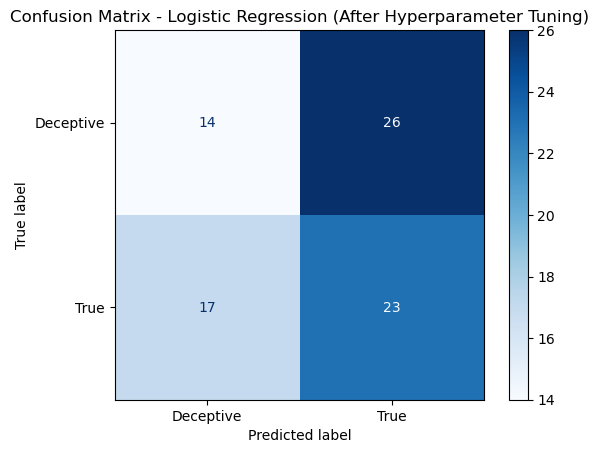

In [149]:
# Define the Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logreg', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

# Define the Parameter Grid for Hyperparameter Tuning
param_grid = {
    'logreg__C': [0.1, 1, 10, 100]  # Regularization strength
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1,
    verbose=2 
)

grid_search.fit(X_train, y_train)

# Best Model and Hyperparameters 
best_logreg_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search.best_score_)

# Training Performance
y_train_pred = best_logreg_model.predict(X_train)
y_train_prob = best_logreg_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

# Validation Performance
# Use cross_val_predict for validation predictions
y_val_pred = cross_val_predict(best_logreg_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_logreg_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (After Hyperparameter Tuning)")
plt.show()


### Logistic Regression Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters: 'logreg__C': 10**

This indicates that the best regularization strength (C) found by GridSearchCV is 10. A higher C value reduces regularization, allowing the model to fit more closely to the training data.
This suggests that the model benefits from reduced regularization, potentially due to the complexity of the dataset.

**Best Cross-Validation Accuracy: 0.5**

This is the mean accuracy across the folds during cross-validation.
An accuracy of 0.5 suggests the model is only marginally better than random guessing for a binary classification task. This indicates that the features might not be strongly predictive, or the dataset could be noisy or imbalanced.

**Training Performance**

**Training Accuracy: 0.5750**

The model performs slightly better than random guessing on the training set, indicating some level of learning but not strong predictive capability.

**F1 Score: 0.6222**

The F1 score is higher than the accuracy because it balances precision and recall. This suggests that while the model's overall classification is modest, it may handle the positive class (True) better.

**AUC-ROC: 0.6106**

An AUC-ROC of 0.61 indicates the model has some ability to rank positive instances higher than negative ones, but the performance is still weak.

**Validation Performance**

**Validation Accuracy: 0.4625**

The drop from training accuracy (0.5750) to validation accuracy (0.4625) suggests some degree of overfitting. The model is not generalizing well to unseen data.

**F1 Score: 0.5169**

The F1 score is lower on the validation set, aligning with the lower accuracy. This reflects the model's struggles in balancing precision and recall on unseen data.

**AUC-ROC: 0.4744**

An AUC-ROC below 0.5 suggests the model has poor discriminatory power, performing close to random guessing on validation data.

**Confusion Matrix**

The confusion matrix shows significant missclassification in both directions, indicating that the model struggles to distinguish between the two classes.

**Overall Performance**

The higher training metrics compared to validation metrics suggest overfitting, meaning that the model memorizes the training data but struggles to generalize to unseen data. The model also has poor validation performance and modest training metrics, indicating that the features may not capture the patterns needed for effective classification.

## Support Vector Machine

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Accuracy (Cross-Validation): 0.6125

Training Metrics:
Accuracy: 0.7875
F1 Score: 0.7901
AUC-ROC: 0.8838

Validation Metrics:
Accuracy: 0.5875
F1 Score: 0.6207
AUC-ROC: 0.6006

Confusion Matrix:
[[20 20]
 [13 27]]


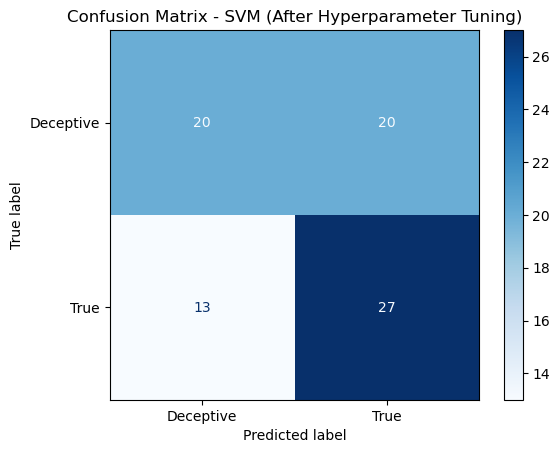

In [151]:
# Define the SVM Pipeline 
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(probability=True, random_state=42))  # SVM with probability outputs
])

# Define the Parameter Grid for Hyperparameter Tuning 
param_grid = {
    'svm__C': [ 0.1, 1, 10],  # Regularization strength
    'svm__kernel': ['linear', 'rbf'],    # Kernel type
    'svm__gamma': ['scale', 'auto']      # Kernel coefficient for RBF
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1,  
    verbose=2  
)

grid_search.fit(X_train, y_train)

# Best Model and Hyperparameters
best_svm_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search.best_score_)

# Training Performance
y_train_pred = best_svm_model.predict(X_train)
y_train_prob = best_svm_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

# Validation Performance
# Use cross_val_predict for validation predictions
y_val_pred = cross_val_predict(best_svm_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_svm_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM (After Hyperparameter Tuning)")
plt.show()


### SVM Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters:**

**'svm__C': 10:** 

A relatively high value of the regularization parameter, allowing the model to focus on minimizing classification errors while controlling the margin's complexity.

**'svm__gamma': 'scale':**

Automatically scales the influence of individual features based on the dataset, making it more adaptive to the data.

**'svm__kernel': 'rbf':**

The radial basis function kernel is effective for capturing complex, non-linear relationships between features.

**Best Accuracy (Cross-Validation): 0.6125**

This indicates that the model achieved an average accuracy of 61.25% across the 5 cross-validation folds. This performance is moderate, suggesting that while the model captures some patterns in the data, it may still have room for improvement.

**Training Performance**

**Accuracy: 0.7875**

A high training accuracy, showing that the model performs well on the training set.

**F1 Score: 0.7901**

The F1 score demonstrates a balance between precision and recall, indicating that the model performs reliably on both false positives and false negatives in the training data.

**AUC-ROC: 0.8838**

A high AUC-ROC value reflects the model's ability to rank predictions correctly, distinguishing between positive and negative classes effectively on the training set.

**Validation Performance**

**Accuracy: 0.5875**

The validation accuracy is moderate, indicating that the model is performing better than random guessing but still struggles to generalize to unseen data.

**F1 Score: 0.6207**

The F1 score reflects the model's ability to balance precision and recall on the validation set. This is an improvement over just accuracy, highlighting a reasonable trade-off between false positives and false negatives.

**AUC-ROC: 0.6006**

The AUC-ROC value suggests that the model has limited but acceptable ability to rank predictions correctly on the validation set.

**Confusion Matrix**

The confusion matrix indicates that while the model identifies **True** samples more accurately than **Deceptive** ones, there are still significant misclassifications in both categories.

**Overall Performance**

The model performs reasonably well on the training data as the training metrics reflect strong performance, however the validation metrics are more moderate, highlighting some degree of overfitting and the challenge of generalization.

## Decision Tree

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best Hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Accuracy (Cross-Validation): 0.6

Training Metrics:
Accuracy: 0.7750
F1 Score: 0.7805
AUC-ROC: 0.8447

Validation Metrics:
Accuracy: 0.4875
F1 Score: 0.5495
AUC-ROC: 0.4766

Confusion Matrix:
[[14 26]
 [15 25]]


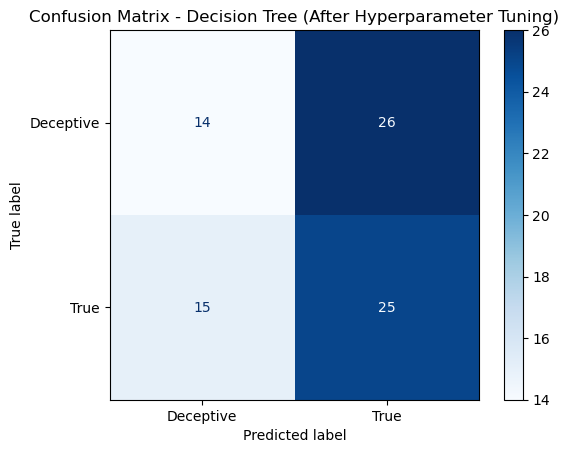

In [153]:
# Define the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the Parameter Grid for Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],          # Maximum depth of the tree
    'min_samples_split': [2, 3, 4, 5, 6],       # Minimum samples required to split a node
    'min_samples_leaf': [5, 10, 15, 20, 25],  # Minimum samples required to be at a leaf node
    'max_leaf_nodes': [5, 10 ,15, 20, 25]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1, 
    verbose=2 
)

grid_search.fit(X_train, y_train)

# Best Model and Hyperparameters
best_dt_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search.best_score_)

# Training Performance
y_train_pred = best_dt_model.predict(X_train)
y_train_prob = best_dt_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

# Validation Performance
# Use cross_val_predict for validation predictions
y_val_pred = cross_val_predict(best_dt_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_dt_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree (After Hyperparameter Tuning)")
plt.show()


### Decision Tree Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters:**

**'max_depth': 4:**

Limits the maximum depth of the tree, preventing overfitting by simplifying the model.

**'max_leaf_nodes': 10:**

Restricts the maximum number of leaf nodes, further controlling model complexity.

**'min_samples_leaf': 5:**

Ensures that each leaf node has at least 5 samples, improving generalization.

**'min_samples_split': 2:**

The minimum number of samples required to split a node.

**Best Accuracy (Cross-Validation): 0.6**

The model achieved 60% accuracy across 5 cross-validation folds. This is moderate and suggests the model is capturing some patterns in the data but has room for improvement.

**Training Performance**

**Accuracy: 0.7750**

The training accuracy indicates that the model is performing well on the training set but not perfectly, which is expected for a regularized decision tree.

**F1 Score: 0.7805**

A high F1 score indicates a balance between precision and recall on the training set, demonstrating good performance across both false positives and false negatives.

**AUC-ROC: 0.8447**

The high AUC-ROC value reflects the model's strong ability to rank predictions correctly on the training data.

**Validation Performance**

**Accuracy: 0.4875**

The validation accuracy is much lower than the training accuracy, indicating significant difficulty in generalizing to unseen data.

**F1 Score: 0.5495**

The F1 score highlights a moderate balance between precision and recall on the validation set. This suggests the model struggles equally with false positives and false negatives.

**AUC-ROC: 0.4766**

An AUC-ROC close to 0.5 shows the model is not significantly better than random guessing at ranking positive and negative predictions on the validation set.

**Confusion Matrix**

The confusion matrix indicates that the model struggles with misclassifications in both classes, particularly in classifying deceptive samples.

**Overall Performance**

This model performs well on the training set but its low validation metrics indicate severe overfitting and difficulty in generalizing to unseen data, which may be due to limitations in the feature set.

### k-NN Model

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best Accuracy (Cross-Validation): 0.625

Training Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Validation Metrics:
Accuracy: 0.6125
F1 Score: 0.6437
AUC-ROC: 0.6206

Confusion Matrix:
[[21 19]
 [12 28]]


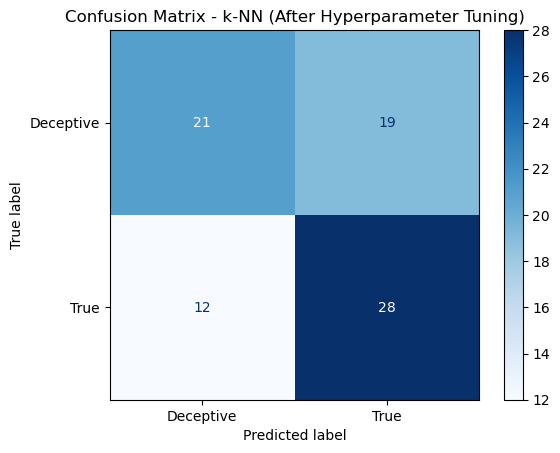

In [155]:
#  Define the k-NN Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())  # k-NN model
])

#  Define the Parameter Grid for Hyperparameter Tuning 
param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11 ,13],         # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1, 
    verbose=2  
)

grid_search.fit(X_train, y_train)

# Best Model and Hyperparameters
best_knn_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search.best_score_)

# Training Performance 
y_train_pred = best_knn_model.predict(X_train)
y_train_prob = best_knn_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

#  Validation Performance 
# Use cross_val_predict for validation predictions
y_val_pred = cross_val_predict(best_knn_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_knn_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - k-NN (After Hyperparameter Tuning)")
plt.show()


### k-Nearest Neighbors Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters:**

**'knn__metric': 'manhattan':**

The Manhattan distance (L1 norm) is used as the distance metric, focusing on absolute differences between feature values.

**'knn__n_neighbors': 9:**

The model considers the 9 nearest neighbors to classify a sample.

**'knn__weights': 'distance':**

Closer neighbors are weighted more heavily in the classification, improving accuracy for imbalanced or overlapping classes.

**Best Accuracy (Cross-Validation): 0.625**

The model achieved 62.5% accuracy during cross-validation, showing decent performance in predicting unseen data within the validation folds.

**Training Performance**

**Accuracy: 1.0000**

Perfect accuracy on the training data indicates that the model fully memorized the training set.

**F1 Score: 1.0000**

A perfect F1 score reflects no false positives or false negatives on the training set.

**AUC-ROC: 1.0000**

The model is perfectly ranking positive and negative samples in the training set.

**Validation Performance**

**Accuracy: 0.6125**

The model's accuracy on the validation set indicates it correctly classified approximately 61.25% of samples, showing better generalization than some other models.

**F1 Score: 0.6437**

A moderately high F1 score suggests a reasonable balance between precision and recall on the validation set.

**AUC-ROC: 0.6206**

The AUC-ROC score reflects the model's ability to rank positive and negative samples correctly, which is slightly better than random guessing (0.5).

**Confusion Matrix**

The confusion matrix highlights a relatively balanced performance. However, there are notable misclassifications in both classes.

**Overall Performance**

The model works very well on the training set due to its non-parametric nature but the overly high training metrics suggest that the k-NN model is overfitting to the training data because it achieves perfect performance but generalizes poorly, as indicated by the validation metrics. However, its validation accuracy and f1 score are reasonable, indicating the model is effeective in handling this dataset to some extent.

# Individual Model Performance Ranking Table

| **Rank** | **Model**          | **Validation Accuracy** | **Validation F1 Score** | **Validation AUC-ROC** |
|----------|---------------------|--------------------------|--------------------------|-------------------------|
| 1        | k-NN               | 0.6125                  | 0.6437                  | 0.6206                 |
| 2        | SVM                | 0.5875                  | 0.6207                  | 0.6006                 |
| 3        | Decision Tree       | 0.4875                  | 0.5495                  | 0.4766                 |
| 4        | Logistic Regression | 0.4625                  | 0.5169                  | 0.4744                 |


## Ensemble Model Training

### Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 400}
Best Accuracy (Cross-Validation): 0.5375

--- Random Forest Results After Hyperparameter Tuning ---
Training Metrics:
Accuracy: 0.6500
F1 Score: 0.6585
AUC-ROC: 0.7278

Validation Metrics:
Accuracy: 0.5500
F1 Score: 0.5610
AUC-ROC: 0.5103
[[21 19]
 [17 23]]


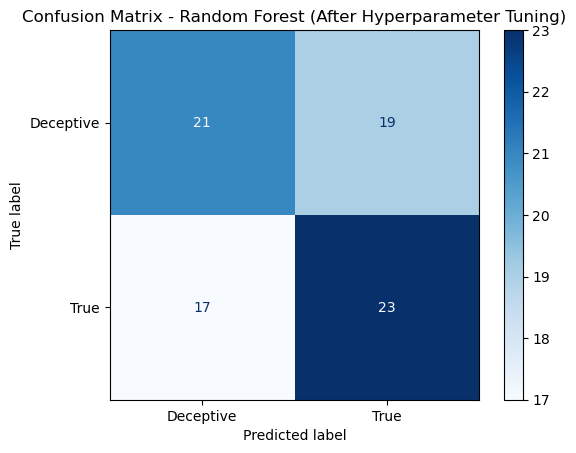

In [160]:
# Define the Random Forest Classifier 
rf_model = RandomForestClassifier(random_state=42)

# Define the Parameter Grid for Hyperparameter Tuning 
param_grid_rf = {
    'n_estimators': [300, 400, 500, 600],  # Number of trees
    'max_depth': [2, 3, 4, 5],       # Maximum depth of each tree
    'min_samples_split': [10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [20, 30],    # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']  # Split quality criterion
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to find the best model
grid_search_rf.fit(X_train, y_train)

#  Retrieve the Best Model 
best_rf_model = grid_search_rf.best_estimator_
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search_rf.best_score_)

# Training Metrics
y_train_pred = best_rf_model.predict(X_train)
y_train_prob = best_rf_model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

# Validation Metrics
y_val_pred = cross_val_predict(best_rf_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_rf_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

# Print Metrics
print("\n--- Random Forest Results After Hyperparameter Tuning ---")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")
print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix 
cm = confusion_matrix(y_train, y_val_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (After Hyperparameter Tuning)")
plt.show()


### Random Forest Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters:**

**'criterion': 'gini':**

The Gini impurity criterion is used to measure the quality of splits.

**'max_depth': 2:**

Trees are restricted to a maximum depth of 2, limiting their complexity and reducing overfitting.

**'min_samples_leaf': 20:**

Each leaf node must contain at least 20 samples, encouraging broader, less specific splits.

**'min_samples_split': 10:**

Nodes must have at least 10 samples to split, ensuring splits occur only when statistically meaningful.

**'n_estimators': 400:**

A high number of trees are used to reduce variance and improve generalization.

**Best Accuracy (Cross-Validation): 0.5375**

The model achieved an average accuracy of 53.75% during cross-validation. This indicates moderate performance on unseen data in the validation folds.

**Training Performance**

**Accuracy: 0.6500**

The training accuracy shows the model correctly classified 65% of the training data. This is not overly high, suggesting the model avoided overfitting to some degree.

**F1 Score: 0.6585**

The F1 score reflects a balance between precision and recall in the training set, which aligns with the moderate accuracy.

**AUC-ROC: 0.7278**

The model demonstrates decent discriminatory ability on the training set, with an AUC-ROC of 0.7278.

**Validation Performance**

**Accuracy: 0.5500**

Validation accuracy of 55% indicates moderate generalization ability but does not represent a significant improvement over random guessing for this dataset.

**F1 Score: 0.5610**

A validation F1 score slightly above 0.56 shows reasonable precision and recall, though there is room for improvement.

**AUC-ROC: 0.5103**

The AUC-ROC is barely above 0.5, indicating that the model struggles to rank positive and negative samples effectively in the validation set.

**Confusion Matrix**

The confusion matrix shows that the model identifies true and deceptive stories fairly equally but still struggles with distinguishing between the classes effectively.

**Overall Performance**

Thee cross-validation accuracy is similar to the validation accuracy, meaning that the model's performance generalizes well within the folds and the validation set. However, the difference between the training metrics and the validation metrics suggests slight overfitting. The low AUC-ROC suggests that the model struggles to rank predictions correctly.

### Gradient Boosting

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'learning_rate': 0.005, 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 500}
Best Accuracy (Cross-Validation): 0.5875

--- Gradient Boosting Results After Hyperparameter Tuning ---
Training Metrics:
Accuracy: 0.7125
F1 Score: 0.6849
AUC-ROC: 0.7466

Validation Metrics:
Accuracy: 0.5625
F1 Score: 0.5679
AUC-ROC: 0.5497
[[22 18]
 [17 23]]


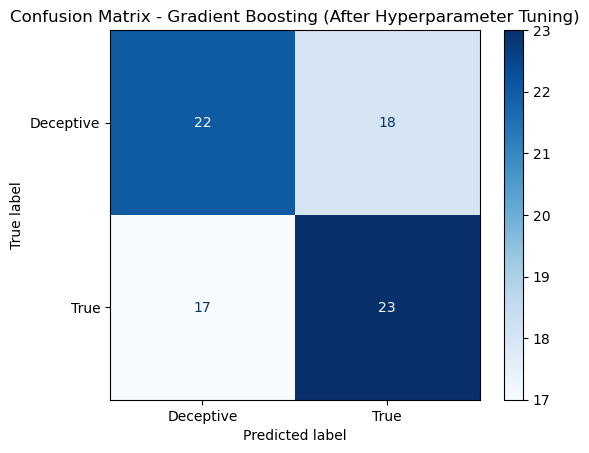

In [162]:
# Define the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define the Parameter Grid for Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [300, 400, 500, 600],  # Number of boosting stages
    'learning_rate': [0.005, 0.01],  # Step size shrinkage
    'max_depth': [1, 2, 3, 4],  # Maximum depth of each tree
    'min_samples_split': [30, 40, 50],  # Minimum samples to split an internal node
    'min_samples_leaf': [30, 40]  # Minimum samples required to be at a leaf node
}

# Perform GridSearchCV 
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  # Optimize for Accuracy
    n_jobs=-1,  
    verbose=2  
)

# Fit GridSearchCV to find the best model
grid_search_gb.fit(X_train, y_train)

# Retrieve the Best Model 
best_gb_model = grid_search_gb.best_estimator_
print("Best Hyperparameters:", grid_search_gb.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search_gb.best_score_)

# Evaluate the Best Model 

# Training Metrics
y_train_pred = best_gb_model.predict(X_train)
y_train_prob = best_gb_model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

# Validation Metrics
y_val_pred = cross_val_predict(best_gb_model, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(best_gb_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

# Print Metrics
print("\n--- Gradient Boosting Results After Hyperparameter Tuning ---")
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")
print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix 
cm = confusion_matrix(y_train, y_val_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting (After Hyperparameter Tuning)")
plt.show()


### Gradient Boosting Results and Analysis
**Hyperparameters and Cross-Validation Performance**

**Best Hyperparameters:**

**learning_rate = 0.005:**

A very small learning rate to ensure incremental learning and reduce overfitting.

**max_depth = 1:**

Shallow trees, which prevent the model from becoming overly complex.

**min_samples_leaf = 30:**

Ensures that leaf nodes have enough data points to generalize.

**min_samples_split = 30:**

Avoids overfitting by requiring more samples to split a node.

**n_estimators = 500:**

A large number of estimators to compensate for the small learning rate.

**Best Accuracy (Cross-Validation): 58.75%**

This reflects the average performance during cross-validation, which is moderate and suggests some ability to generalize.

**Training Performance**

**Accuracy: 71.25%**

Indicates that the model performs reasonably well on the training data.

**F1 Score: 0.6849**

Demonstrates a good balance between precision and recall in training.

**AUC-ROC: 0.7466**

Reflects the model's ability to rank predictions effectively for training data.

**Validation Performance**

**Accuracy: 56.25%**

A noticeable drop compared to training accuracy, indicating potential overfitting.

**F1 Score: 0.5679**

Moderate balance between precision and recall for the validation set.

**AUC-ROC: 0.5497**

Only slightly better than random guessing, suggesting the model struggles with ranking predictions on unseen data.

**Confusion Matrix**

The confusion matrix shows a fairly balanced distribution of errors across false positives and false negatives, indicating that the model is not biased towards one class.

**Overall Performance**

The model shows moderate performance. The training accuracy is relatively higher than the validation accuracy, indicating overfitting to a certain degree and suggesting struggles in generalization. The AUC-ROC is also decreased in validation, further highlighting this issue.

### Stacking Ensemble 

Due to k-NN and SVM having the best performance in terms of validation accuracy, they will be combined using a stacking ensemble as this should combine their different strengths and make a more robust model, reducing overfitting by increasing diversity in learning mechanisms. 


Training Metrics
Accuracy: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000

Validation Metrics
Accuracy: 0.6625
F1 Score: 0.6667
AUC-ROC: 0.5825

Confusion Matrix:
[[26 14]
 [13 27]]


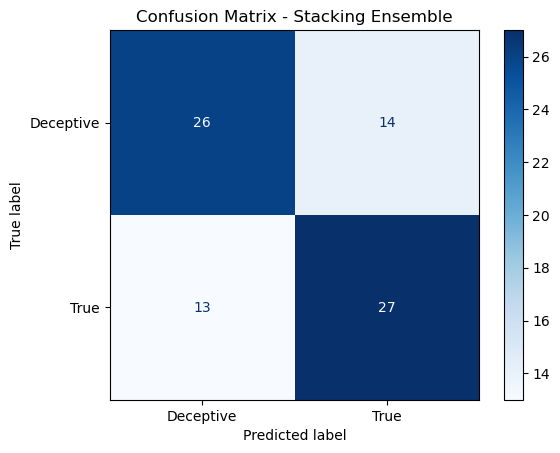

In [164]:
# Define the base models (best KNN and best SVM)
base_estimators = [
    ('knn', best_knn_model),
    ('svm', best_svm_model)  
]

# Define the meta-model (Logistic Regression in this case)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=base_estimators,  # Base models
    final_estimator=meta_model,  # Meta-model
    cv=5,  # Cross-validation folds for training meta-model
    stack_method='predict_proba'  # Use probabilities for meta-model input
)

# Train the stacking ensemble
stacking_ensemble.fit(X_train, y_train)

# --- Training Metrics ---
y_train_pred = stacking_ensemble.predict(X_train)
y_train_prob = stacking_ensemble.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

# Cross-Validation Metrics
from sklearn.model_selection import cross_val_predict

y_val_pred = cross_val_predict(stacking_ensemble, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(stacking_ensemble, X_train, y_train, cv=5, method='predict_proba')[:, 1]

val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix 
cm = confusion_matrix(y_train, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Stacking Ensemble")
plt.show()



### Stacking Ensemble Results and Analysis

**Training Performance**

**Accuracy: 1.0000**

The model achieves perfect accuracy on the training dataset. This is a sign of overfitting because the validation performance is substantially lower.

**F1 Score: 1.0000**

A perfect F1 score indicates that the model has no false positives or false negatives on the training set, another sign of overfitting.

**AUC-ROC: 1.0000**

The AUC-ROC also being perfect reflects the same overfitting trend, as the model fully separates the two classes on the training data.

**Validation Performance**

**Accuracy: 0.6625**

The validation accuracy shows the stacking ensemble performs better than the individual models, particularly k-NN and SVM, on unseen data. However, the improvement is moderate and indicates room for further optimization.

**F1 Score: 0.6667**

The F1 score balances precision and recall, suggesting the ensemble handles both false positives and false negatives moderately well.

**AUC-ROC: 0.5825**

The AUC-ROC indicates that while the stacking ensemble provides better rank ordering of predictions compared to some individual models, it is still not ideal for capturing probabilistic separations between the classes.

**Confusion Matrix**

The confusion matrix shows a fairly balanced distribution, performing marginally better on detecting true samples.

**Overall Performance**

The stacking ensemble seems to be a slight improvement over individual models like k-NN and SVM, but it is overfitting. However, the validation results indicate that the model still generalizes better than the individual models. The AUC-ROC value indicates that it struggles to rank predictions.

### Voting Ensemble 

I tried using a stacking ensemble for the gradient boosting and random forest models, but the validation performance of the voting ensemble is greater than that of the stacking ensemble combining these two models. This might be due to how the errors of both models not being significantly different, therefore favouring voting as an ensemble method over stacking.


Training Metrics:
Accuracy: 0.6875
F1 Score: 0.6753
AUC-ROC: 0.7453

Validation Metrics:
Accuracy: 0.5875
F1 Score: 0.5926
AUC-ROC: 0.5472
[[23 17]
 [16 24]]


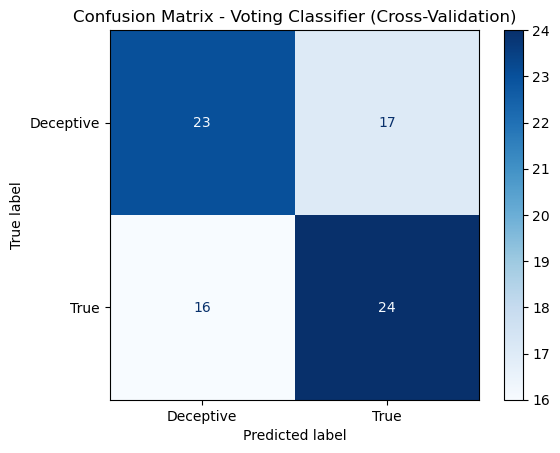

In [168]:
# Combine models in a voting classifier
voting_ensemble = VotingClassifier(
    estimators=[
        ('random forest', best_rf_model),
        ('gradient boosting', best_gb_model)
    ],
    voting='soft'  # Use 'soft' for averaging probabilities
)

# Perform cross-validation
cv_results = cross_validate(
    voting_ensemble,
    X_train,
    y_train,
    cv=5,
    scoring={
        'accuracy': 'accuracy',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    },
    return_train_score=True,
    n_jobs=-1
)

# Fit the voting ensemble on the entire training dataset
voting_ensemble.fit(X_train, y_train)

# --- Training Metrics ---
y_train_pred = voting_ensemble.predict(X_train)
y_train_prob = voting_ensemble.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc_roc = roc_auc_score(y_train, y_train_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"AUC-ROC: {train_auc_roc:.4f}")

# Obtain cross-validated predictions
y_val_pred = cross_val_predict(voting_ensemble, X_train, y_train, cv=5)
y_val_prob = cross_val_predict(voting_ensemble, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute validation metrics
val_accuracy = accuracy_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_auc_roc = roc_auc_score(y_train, y_val_prob)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"AUC-ROC: {val_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train, y_val_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Voting Classifier (Cross-Validation)")
plt.show()


### Soft Voting Ensemble Results and Analysis

**Training Performance**

**Accuracy: 0.6875**

This indicates that the stacking ensemble correctly classified approximately 71.25% of the training data. While this is a reasonable accuracy, it is not perfect and leaves room for improvement.

**F1 Score: 0.6753**

The F1 score reflects a balance between precision and recall in the training set. A score of 0.6849 suggests that the model performs decently at managing the trade-off between false positives and false negatives but isn't overly skewed toward either precision or recall.

**AUC-ROC: 0.7453**

The AUC-ROC score indicates that the model can separate the classes reasonably well in the training data. A score of 0.7341 is moderate, showing that the model has a fair ability to rank true positives higher than false positives.

**Validation Performance**

**Accuracy: 0.5875**

On the validation set, the stacking ensemble achieves 58.75% accuracy, lower than its training accuracy (0.7125). This drop might indicate some level of overfitting, where the model is more optimized for the training data and generalizes less effectively to unseen validation data.

**F1 Score: 0.5926**

The F1 score on the validation set is 0.5926, slightly lower than the training F1 score. This suggests that while the model maintains a balance between precision and recall, its generalization to unseen data is limited compared to its performance on the training set.

**AUC-ROC: 0.5472**

The AUC-ROC score on the validation set is 0.5472, significantly lower than the training AUC-ROC score. This indicates that the stacking ensemble struggles to rank predictions effectively in the validation set. Such a drop suggests overfitting or a lack of sufficient learning for generalization.

**Confusion Matrix**

The model performs reasonably well at identifying classes and is fairly balanced but still has room for improvement in reducing false positives and false negatives.

**Overall Performance**

The voting ensemble performs slightly better than the random forest and gradient boosting models but still shows signs of overfitting in all aspects due to its validation performance being noticeably lower than that of its training performance.

## Final Model Validation Metrics
| Model                | Validation Accuracy | Validation F1 | Validation AUC-ROC | Overfitting Concern |
|-----------------------|---------------------|---------------|---------------------|----------------------|
| Logistic Regression   | 0.4625             | 0.5169        | 0.4744              | No                  |
| SVM                   | 0.5875             | 0.6207        | 0.6006              | Moderate             |
| Decision Tree         | 0.4875             | 0.5495        | 0.4766              | Moderate             |
| KNN                   | 0.6125             | 0.6437        | 0.6206              | Yes (overfits)       |
| Random Forest         | 0.5500             | 0.5610        | 0.5103              | No                  |
| Gradient Boosting     | 0.5625             | 0.5679        | 0.5497              | No                  |
| Stacking Ensemble     | **0.6625**         | **0.6667**    | **0.5825**          | Yes (overfits)       |
| Voting Ensemble       | 0.5875             | 0.5926        | 0.5472              | Moderate             |

Based on these metrics and prioritizing validation accuracy, the stacking ensemble seems to perform better than other models despite it being overfitting. As such, it will be chosen as the final model to test. The next option would be to use SVM, as the concern of overfitting is moderate compared to the stacking ensemble whilst maintaining an above average validation accuracy, F1 score, and AUC-ROC. Using kNN might yield similar results to the stacking ensemble as the ensemble consists of kNN and SVM, and its training and validation metrics are very similar.

## Testing


--- Stacking Ensemble Test Results ---
Accuracy: 0.4000
F1 Score: 0.4545
AUC-ROC: 0.3700
[[3 7]
 [5 5]]


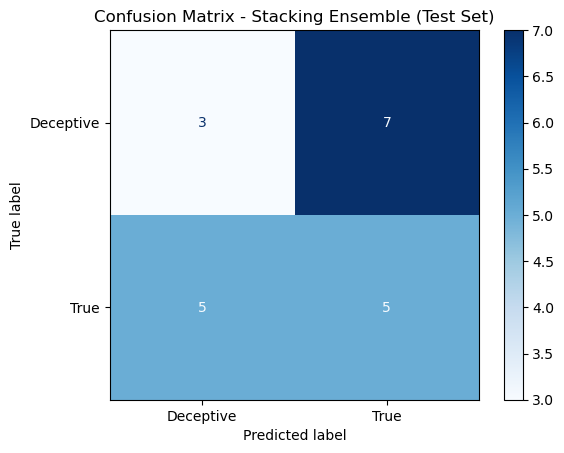

In [191]:
# Load the test features
test_features_df = pd.read_csv("test_features.csv")

# Extract features (X) and labels (y) for the test set
X_test = test_features_df[['Power', 'Pitch_Mean', 'Pitch_Std', 'Voiced_Ratio']].values
y_test = test_features_df['Label'].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data

# Predict on the test set using the stacking ensemble model
y_test_pred = stacking_ensemble.predict(X_test_scaled)
y_test_prob = stacking_ensemble.predict_proba(X_test_scaled)[:, 1]

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_prob)

# Print metrics
print("\n--- Stacking Ensemble Test Results ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC-ROC: {test_auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Deceptive', 'True'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Stacking Ensemble (Test Set)")
plt.show()


## Stacking Ensemble Test Results and Analysis

**Test Performance:**

**Accuracy (0.4000):**
The stacking ensemble correctly classified only 40% of the test samples. This indicates poor overall predictive performance on the unseen test set.

**F1 Score (0.4545):**

The F1 score balances precision and recall, and a value of 0.4545 suggests the model struggles to maintain a good trade-off between false positives and false negatives.

**AUC-ROC (0.3700):**

The AUC-ROC score is below 0.5, indicating that the model is performing worse than random guessing when ranking probabilities for the positive class.

**Confusion Matrix**

The confusion matrix indicates that the model produces more false positives than true positives, showing a tendency to incorrectly classify true stories as deceptive. The number of false positives and negatives also exceeds the number of true positives and true negatives, suggesting poor overall classification performance.

**Overall Performance**

The test metrics indicate that the stacking ensemble struggles with generalization on the test data despite showing better performance during training and validation. Moreover, the confusion matrix reveals a significant number of misclassifications. The AUC-ROC score also highlights this as the model is unable to rank predictions correctly and is performing worse than random chance (0.5).

## 7 Conclusions

This notebook aimed to build and evaluate machine learning models for classifying true and deceptive stories from the MLEnd Deception Dataset. The primary focus was on extracting meaningful features from audio data, evaluating the performance of multiple models, and experimenting with ensemble methods to improve classification accuracy.

**Things to Note:**

**Feature Extraction:**

The extracted features (Power, Pitch_Mean, Pitch_Std, and Voiced_Ratio) provided some predictive power but may not have fully captured the complexity of the task.
The limited feature set likely contributed to the overall modest performance of all models.

**Individual Models:**

Among individual models, K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) showed relatively strong performance in validation metrics, with KNN achieving the highest validation accuracy (0.6125).

Decision trees and logistic regression performed less effectively, with noticeable drops in validation performance compared to their training metrics, indicating overfitting or insufficient feature representation.

**Ensemble Methods:**

Stacking and Voting ensembles were implemented to leverage the strengths of multiple models:
The Stacking Ensemble, combining KNN and SVM with a logistic regression meta-model, achieved the best validation metrics (Accuracy: 0.6625, F1 Score: 0.6667) even though it showed clear signs of overfitting with perfect training metrics.

The Voting Ensemble combining Gradient Boosting and Random Forest models demonstrated comparable validation performance but fell short of the stacking ensemble.
Ensemble methods generally outperformed individual models in validation metrics, emphasizing the benefit of combining multiple classifiers to a certain degree.

**Testing Performance:**

When applied to the unseen test set, the stacking ensemble achieved **Accuracy: 0.4000**, **F1 Score: 0.4545**, and an **AUC-ROC: 0.3700**. This significant drop from validation performance suggests that the models struggled to generalize, possibly due to:
- Overfitting during training.
- Insufficiently discriminative features.
- Limited dataset size or inherent noise in the data.

**Limitations Identified:**

The dataset size was relatively small, potentially limiting the models' ability to learn complex patterns and generalize to unseen data.
Feature extraction from 30-second audio clips may not have fully captured the nuances needed to distinguish between classes while
computational and time constraints limited the exploration of deeper or more complex models (e.g., neural networks). Furthermore, the audio recordings present in the sample include recordings in different languages, which introduces several variability and potential biases. For example, different languages have different prosodic and phonetic structures, influencing features like pitch, tone, and stress. The ratio of English to other languages is also very unbalanced (78 to 22). As such, the model may not generalize well to other languages, leading to linguistically biased results.

**Implications and Recommendations:**

**Feature Improvements:**

Additional audio features may be incorporated, such as spectral features (e.g., Mel-frequency cepstral coefficients), energy dynamics, or linguistic features derived from transcription.

**Model Selection:**

While the stacking ensemble provided the best overall validation performance, its generalization ability remains a concern. Exploring simpler models with better regularization may yield more robust results.

**Incorporating Multilingual Data:**

Use multilingual pre-trained models (like wav2vec or HuBERT) that can handle cross-linguistic variability in audio data.

**Data Augmentation:**

Use data augmentation techniques to increase the effective size of the dataset and reduce overfitting.

**Experimentation with Deep Learning:**

Neural networks, particularly those tailored for audio data (e.g., Convolutional Neural Networks or Recurrent Neural Networks), may better capture complex patterns inherent in the audio clips.

**Conclusion:**

This notebook demonstrated the utility of various machine learning and ensemble methods for classifying true and deceptive stories. While ensemble methods like stacking showed promise, the results highlighted significant challenges in feature representation and model generalization. Future efforts should focus on improving feature extraction, addressing data limitations, and experimenting with advanced models to achieve better performance and reliability in deception detection tasks.

## 8 References

Villar, G., Arciuli, J., & Paterson, H. (2013). Vocal pitch production during lying: Beliefs about deception matter. Psychiatry, Psychology and Law, 20(1), 123-132.

Benus, S., Enos, F., Hirschberg, J. B., & Shriberg, E. (2006). Pauses in deceptive speech.

Rockwell, P., Buller, D. B., & Burgoon, J. K. (1997). The voice of deceit: Refining and expanding vocal cues to deception. Communication Research Reports, 14(4), 451-459.

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingClassifier.html

https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.VotingClassifier.html
